#IMAGENET - RESNET50 - NESNE TANIMA

##Kütüphanelerin Yüklenmesi

ImageNet veriseti ile eğitilmiş model ve ağırlıkları yükleme

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [2]:
import os
os.chdir("/gdrive/My Drive/#6 - Evrisimli Sinir Aglari/ResNet50_NesneTanima/")

In [ ]:
!ls

In [4]:
!pip3 install -q keras

In [5]:
from keras.applications import ResNet50
from keras.utils import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [6]:
model = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 5s 0us/step


##Resmi girişe uygun formata getirmek için yeniden boyutlandırma fonksiyonu tanımlama

In [7]:
def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

##Sınıflandırma İstenilen Resmin Web Adresi ile Bulma

In [8]:
ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70\"" #@param {type:"string"}


###Girilen Web Adresinden Resmi İndirme

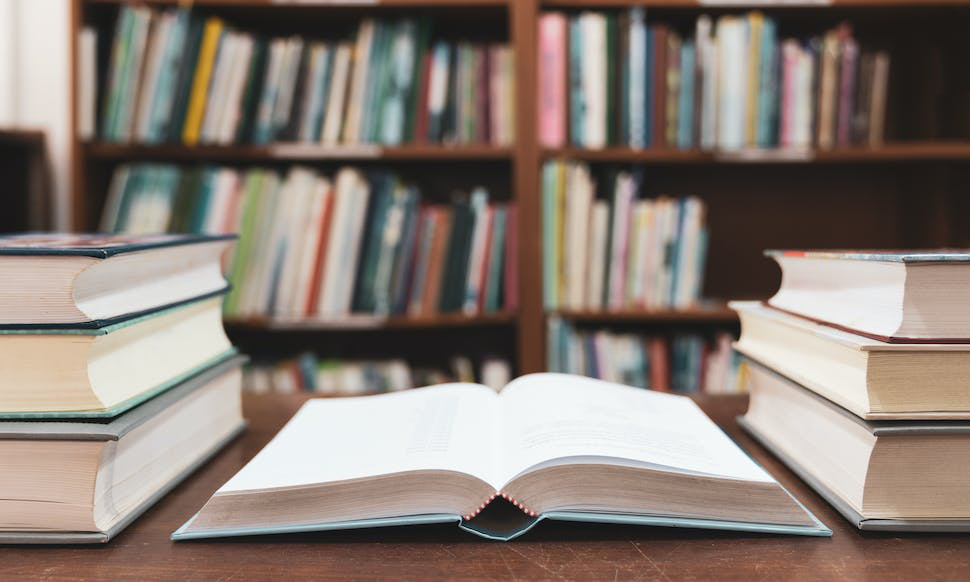

In [9]:
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

###Eğitilmiş Model İle Sınıflandırma Yapmak

In [10]:
data = {"success":False}
pre_image = prepare_image(image, target=(224, 224))#224x224 boyutlu hale getiriyoruz

predicted = model.predict(pre_image)#Hazır modele resimi vererek tahminde bulunuyoruz
results = imagenet_utils.decode_predictions(predicted)
data["predictions"]=[]

for(imagenetID, label, prob) in results[0]:#ImageNet veri kümesinden etiket, olasılık ve tahmin sonucunu al
  r = {"label":label, "probability":float(prob)}
  data["predictions"].append(r)
data["success"]=True

print(data)

35363/35363 [==============================] - 0s 0us/step
{'success': True, 'predictions': [{'label': 'library', 'probability': 0.8283472657203674}, {'label': 'bookshop', 'probability': 0.13488343358039856}, {'label': 'bookcase', 'probability': 0.03432555869221687}, {'label': 'binder', 'probability': 0.0007228656904771924}, {'label': 'book_jacket', 'probability': 0.0002722983481362462}]}


In [11]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1} dir.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"]))
#En yüksek olasılıklı sonucu ekrana yazdırır.

Sınıflandırma tahmini en yüksek olan 0.8283472657203674 oranıyla library dir.
